In [41]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cpu'

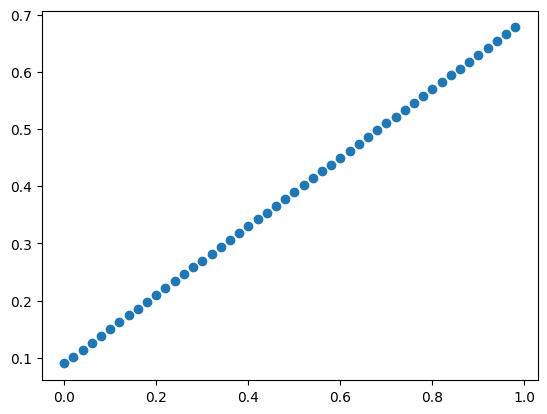

In [42]:
weight = 0.6
bias = 0.09
start =0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
plt.scatter(X.numpy(), y.numpy())
plt.show()

In [43]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions=None)->None:
    plt.scatter(
        X_train.numpy(),
        y_train.numpy(),
        c="c",
        label="train data"
    )
    plt.scatter(
        X_test.numpy(),
        y_test.numpy(),
        c="m",
        label="test data"
    )
    if predictions is not None:
        plt.plot(
            X_test.numpy(),
            predictions.numpy(),
            c="r",
            label="predictions"
        )
    plt.legend()
    plt.show()


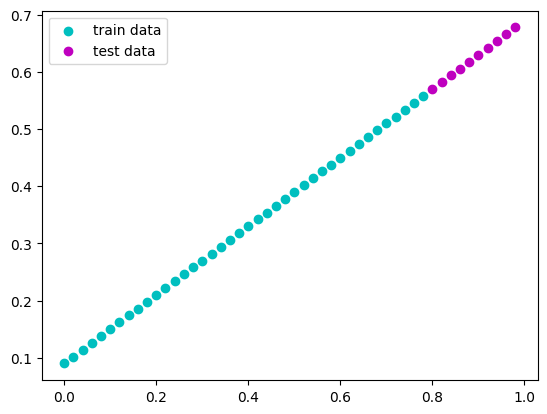

In [44]:
train_data_count:int=int(len(X)*0.8)
X_train,X_test = X[:train_data_count],X[train_data_count:]
y_train,y_test = y[:train_data_count],y[train_data_count:]
plot_predictions(X_train, y_train, X_test, y_test, None)

In [45]:
class LinearRegressionCustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True))
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

In [46]:
def trainer(epochs:int, learning_rate:float, model:nn.Module, loss_fn:nn.Module, optimizer:torch.optim.Optimizer, X_train:torch.Tensor, y_train:torch.Tensor)->None:
    for epoch in range(epochs):
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 5 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

In [47]:
torch.manual_seed(69)
model_0 = LinearRegressionCustomModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8398], requires_grad=True),
 Parameter containing:
 tensor([0.8042], requires_grad=True)]

In [48]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8398])), ('bias', tensor([0.8042]))])

In [50]:
learning_rate = 0.01
epochs = 100
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=learning_rate)
trainer(epochs, learning_rate, model_0, loss_fn, optimizer, X_train, y_train)

Epoch: 0 | Loss: 0.8076667785644531
Epoch: 5 | Loss: 0.7500618696212769
Epoch: 10 | Loss: 0.6924570202827454
Epoch: 15 | Loss: 0.6348519325256348
Epoch: 20 | Loss: 0.5772470235824585
Epoch: 25 | Loss: 0.5196421146392822
Epoch: 30 | Loss: 0.46203717589378357
Epoch: 35 | Loss: 0.4044322371482849
Epoch: 40 | Loss: 0.34682732820510864
Epoch: 45 | Loss: 0.28922238945961
Epoch: 50 | Loss: 0.23161742091178894
Epoch: 55 | Loss: 0.17401251196861267
Epoch: 60 | Loss: 0.11640747636556625
Epoch: 65 | Loss: 0.05880247429013252
Epoch: 70 | Loss: 0.006696016993373632
Epoch: 75 | Loss: 0.004979359917342663
Epoch: 80 | Loss: 0.003259951714426279
Epoch: 85 | Loss: 0.00160985067486763
Epoch: 90 | Loss: 0.002711097477003932
Epoch: 95 | Loss: 0.008809901773929596


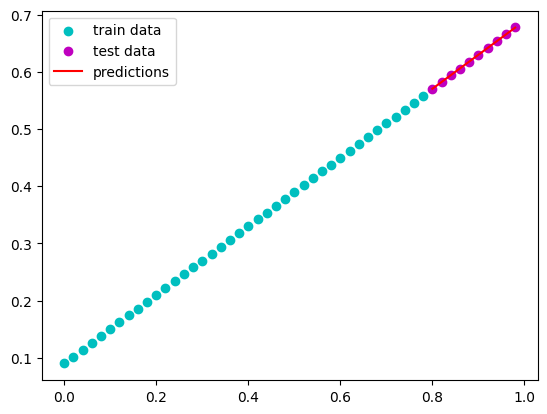

In [51]:
with torch.inference_mode():
    predictions = model_0(X_test)
    plot_predictions(X_train, y_train, X_test, y_test, predictions)
